**Competition Description**
--

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

![House](https://img.freepik.com/free-photo/house-isolated-field_1303-23773.jpg?w=1380&t=st=1701754303~exp=1701754903~hmac=615879ebc6f9b03f827bdfc0608a647c0f0e26fd10c04f4e9e35bb62bfb1e511)

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skill
--

Skill that you will get:

- Creative Feature Engineering
- Advanced Regression Technique


Acknowledgement
--

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 


---

Evaluation
--

**Goal**

Predict the sales price for each house. For each ID in the test set, you must predict the value of the SalePrice variable.


**Metric**

Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


Citation
--

Anna Montoya, DataCanary. (2016). House Prices - Advanced Regression Techniques. Kaggle. https://kaggle.com/competitions/house-prices-advanced-regression-techniques


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import data
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

### Data Mining

In [5]:
df_train.select_dtypes(include='object').shape

(1460, 43)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
#combine two datasets
all_data = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],
                    df_test.loc[:,'MSSubClass':'SaleCondition']))

In [8]:
all_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Exploratory Data Analysis

In [12]:
#Density plot
k = 11
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 0.60)
hm = sns.heatmap(cm, cbar = True, square = True, annot = True, fmt = '.2f', xticklabels = cols.values, yticklabels = cols.values)

ValueError: could not convert string to float: 'RL'

### Data Preprocessing

In [40]:
#detect null data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending=False)
data_ = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
data_.head(10)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


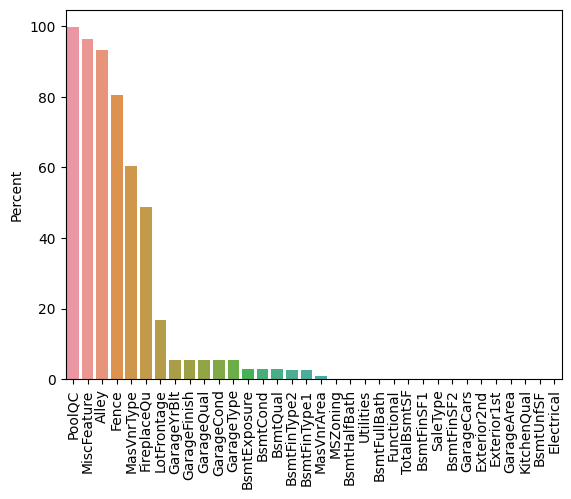

In [42]:
#visualization of missing data
miss_data = data_.drop(data_[data_['Total']==0].index)
sns.barplot(data = miss_data, x = miss_data.index, y = miss_data.Percent)
plt.xticks(rotation = 90)
plt.show()

In [43]:
#Drop and fill certain data
all_data = all_data.drop((data_[data_['Total']>80]).index, axis = 1)
all_data = all_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [44]:
#Let's check one more time
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending=False)
data_ = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
data_.head(10)

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
CentralAir,0,0.0
Electrical,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0
GrLivArea,0,0.0
BsmtFullBath,0,0.0
BsmtHalfBath,0,0.0


In [45]:
#Object data
#feature_data = ['MSSubClass', 'LotArea', 'Street', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType']

In [46]:
#selected_feat_obj = ['Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType']

In [47]:
all_data[all_data[all_data.columns]==0].count().sort_values(ascending = False)

PoolArea         2906
3SsnPorch        2882
LowQualFinSF     2879
MiscVal          2816
BsmtHalfBath     2744
                 ... 
Foundation          0
BsmtFinType1        0
BsmtFinType2        0
MSZoning            0
SaleCondition       0
Length: 64, dtype: int64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

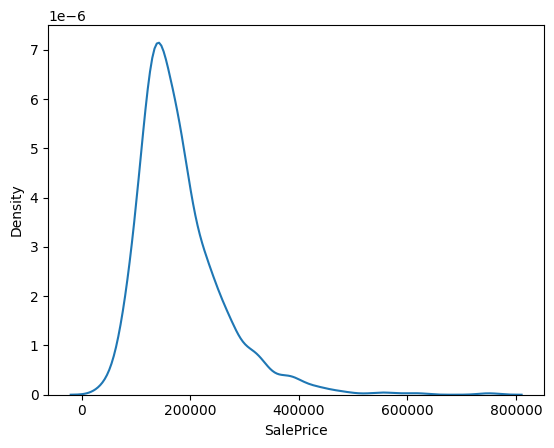

In [49]:
#Normal Distribution of Saleprice in train dataset
sns.kdeplot(df_train, x = df_train.SalePrice)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GrLivArea', ylabel='Density'>

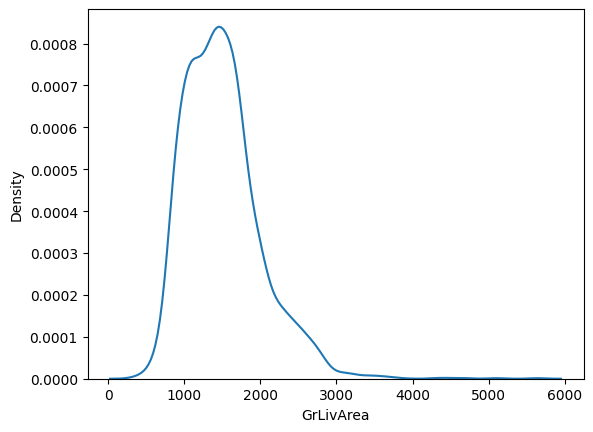

In [51]:
#Normal distribution of GrLivArea in train_dataset
sns.kdeplot(all_data, x = all_data.GrLivArea)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Normal Distribution  of SalePrice after Log Transformation')

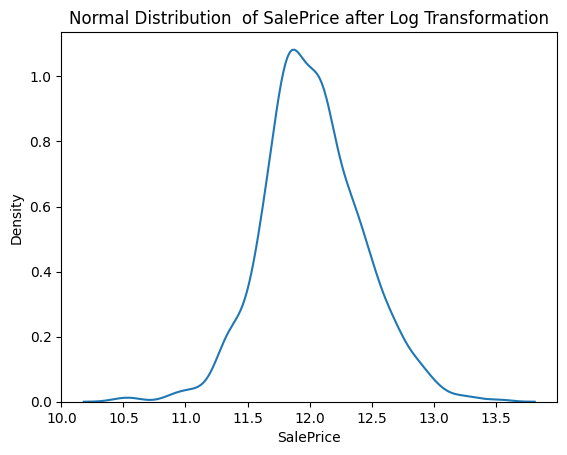

In [56]:
#log transform skewed data
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.kdeplot(df_train, x = df_train['SalePrice'])
plt.title('Normal Distribution  of SalePrice after Log Transformation')

In [57]:
#Check skewness
from scipy.stats import skew
numeric_feat = all_data.dtypes[all_data.dtypes != 'object'].index
skew_feats = all_data[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skew_feats= skew_feats[skew_feats>0.5]
print('Skew in numeric features')
skew_data = pd.DataFrame({'Skew':skew_feats})
skew_data

Skew in numeric features


,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [58]:
skew_data.index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '1stFlrSF',
       'BsmtFinSF1', 'MSSubClass', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'BsmtFullBath',
       'OverallCond'],
      dtype='object')

In [64]:
#log transformation to reduce skewness
all_data[skew_feats.index] = np.log1p(all_data[skew_feats.index])

In [66]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.5]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew
PoolArea,14.998335
3SsnPorch,8.825256
LowQualFinSF,8.557690
MiscVal,5.213984
BsmtHalfBath,3.774762
KitchenAbvGr,3.520351
ScreenPorch,2.945905
BsmtFinSF2,2.462483
EnclosedPorch,1.961081
HalfBath,0.580692


In [67]:
all_data[all_data[all_data.columns] == 0].count().sort_values(ascending = False).head(15)

PoolArea         2906
3SsnPorch        2882
LowQualFinSF     2879
MiscVal          2816
BsmtHalfBath     2744
ScreenPorch      2663
BsmtFinSF2       2572
EnclosedPorch    2460
HalfBath         1834
MasVnrArea       1761
BsmtFullBath     1707
2ndFlrSF         1668
WoodDeckSF       1523
Fireplaces       1420
OpenPorchSF      1298
dtype: int64

In [68]:
#zero value cannot be converted, so we have to delete it.
all_data = all_data.drop((skewness_train[skewness_train['Skew']>0.5]).index, axis = 1)

In [70]:
#Let's check it one more time
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.5]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew


### Create prediction

In [75]:
#import train data
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y_train = df_train.SalePrice

In [77]:
#import packages
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5))
    return rmse

def rmse_test(y, y_pred):
    rmse_ = np.sqrt(mean_squared_error(y, y_test))
    return rmse_

In [78]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

categorical = X_train.select_dtypes(include='object').columns

for col in categorical:
    lbl = LabelEncoder()
    lbl.fit(list(X_train[col].values))
    X_train[col]  = lbl.transform(list(X_train[col].values))
    X_test[col] = lbl.transform(list(X_test[col].values))

C:\Users\HP\AppData\Local\Temp\ipykernel_8548\3457454329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]  = lbl.transform(list(X_train[col].values))
C:\Users\HP\AppData\Local\Temp\ipykernel_8548\3457454329.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = lbl.transform(list(X_test[col].values))
C:\Users\HP\AppData\Local\Temp\ipykernel_8548\3457454329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [81]:
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,3,9.042040,1,3,3,0,4,0,5,...,0.000000,2.0,548.0,2,0.000000,4.127134,2,2008,8,4
1,3.044522,3,9.169623,1,3,3,0,2,0,24,...,0.693147,2.0,460.0,2,5.700444,0.000000,5,2007,8,4
2,4.110874,3,9.328212,1,0,3,0,4,0,5,...,0.693147,2.0,608.0,2,0.000000,3.761200,9,2008,8,4
3,4.262680,3,9.164401,1,0,3,0,0,0,6,...,0.693147,3.0,642.0,2,0.000000,3.583519,2,2006,8,0
4,4.110874,3,9.565284,1,0,3,0,2,0,15,...,0.693147,3.0,836.0,2,5.262690,4.442651,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,3,8.976894,1,3,3,0,4,0,8,...,0.693147,2.0,460.0,2,0.000000,3.713572,8,2007,8,4
1456,3.044522,3,9.486152,1,3,3,0,4,0,14,...,1.098612,2.0,500.0,2,5.857933,0.000000,2,2010,8,4
1457,4.262680,3,9.109746,1,3,3,0,4,0,6,...,1.098612,1.0,252.0,2,0.000000,4.110874,5,2010,8,4
1458,3.044522,3,9.181735,1,3,3,0,4,0,12,...,0.000000,1.0,240.0,2,5.905362,0.000000,4,2010,8,4


In [27]:
#Ridge model RMSE result in different alphas
alphas =  [0.05, 0.1, 1, 1.5, 2, 5, 10]
ridge_cv = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
ridge_cv_series = pd.Series(ridge_cv, index = alphas)
ridge_cv_series

0.05     0.136354
0.10     0.136324
1.00     0.136010
1.50     0.135937
2.00     0.135904
5.00     0.136035
10.00    0.136584
dtype: float64

Text(0, 0.5, 'RMSE')

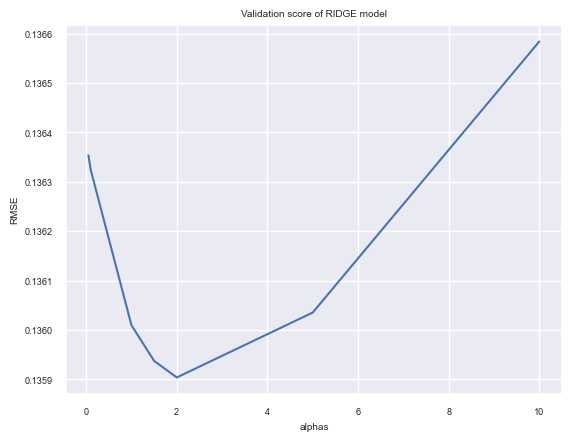

In [28]:
#Ridge model visualization
ridge_cv_series.plot(title = 'Validation score of RIDGE model')
plt.xlabel('alphas')
plt.ylabel('RMSE')

In [29]:
#Lasso model RMSE result in different alpha
lasso_cv = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
lasso_cv_series = pd.Series(lasso_cv, index=alphas)
lasso_cv_series

0.05     0.199797
0.10     0.221897
1.00     0.268183
1.50     0.274387
2.00     0.282833
5.00     0.304825
10.00    0.307456
dtype: float64

Text(0, 0.5, 'RMSE')

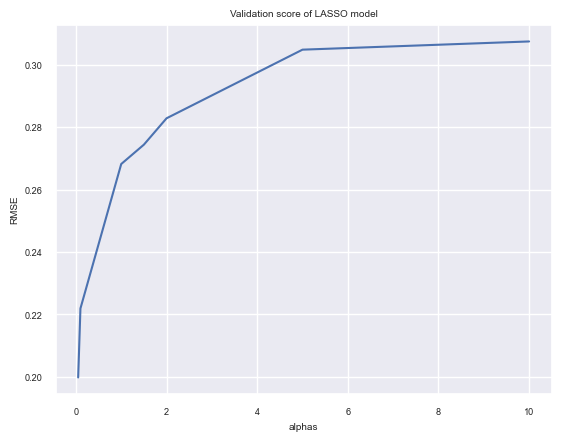

In [30]:
lasso_cv_series.plot(title = 'Validation score of LASSO model')
plt.xlabel('alphas')
plt.ylabel('RMSE')

In [31]:
lassocv = LassoCV(alphas = [1, 0.5, 0.1, 0.05, 0.001]).fit(X_train,y_train)
rmse_cv(lassocv).mean()

0.13572101487999486

In [32]:
# using LassoCV coefficient to see coefficient each feature
coef = pd.Series(lassocv.coef_, index = X_train.columns)

In [33]:
#show non-zero coefficient
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminate other ' + str(sum(coef == 0)) + ' variables')

Lasso picked 46 variables and eliminate other 8 variables


In [34]:
#Coefficient of lassocv
coef_series = pd.concat([coef.sort_values().head(12), coef.sort_values().tail(12)])

Text(0.5, 1.0, 'Coefficient in LassoCV model')

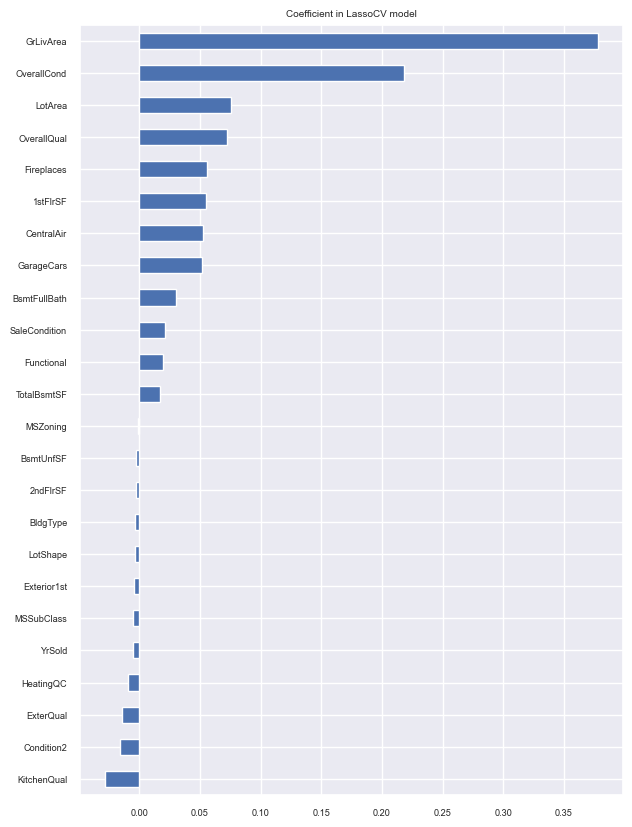

In [35]:
#Visualize coefficient of LassoCV model
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7,10)
coef_series.plot(kind = 'barh')
plt.title('Coefficient in LassoCV model')

In [36]:
#Utilize XGB model
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {'max_depth':2, 'eta':0.1}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

Text(0, 0.5, 'Average RMSE')

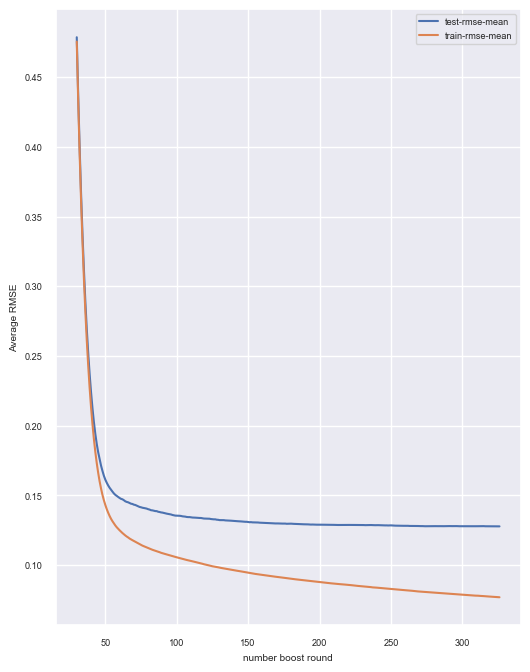

In [37]:
#create visualization
matplotlib.rcParams['figure.figsize'] = (6,8)
model.loc[30:,['test-rmse-mean','train-rmse-mean']].plot()
plt.xlabel('number boost round')
plt.ylabel('Average RMSE')

In [38]:
#the model works well. 
xgb_model = xgb.XGBRegressor(n_estimators = 1000, max_depth = 2, learning_rate = 0.15)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
#XGB and Lasso model prediction variables
predict_xgb = np.expm1(xgb_model.predict(X_test))
lassocv_pred = np.expm1(lassocv.predict(X_test))

Text(0.5, 1.0, 'Linearity of two regression models')

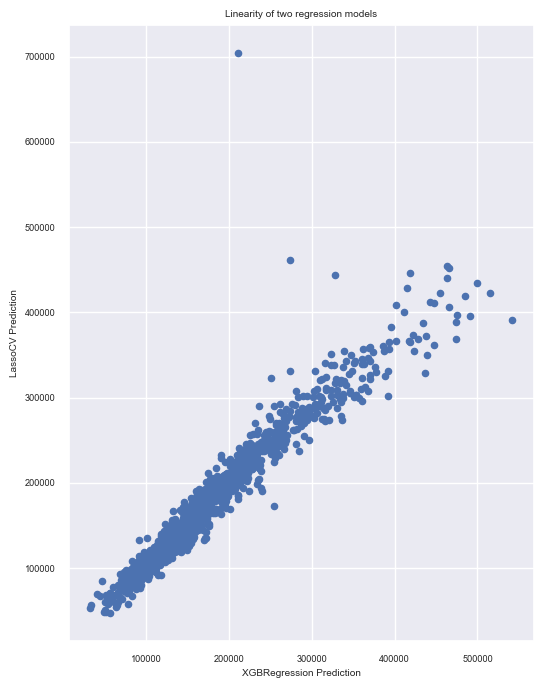

In [40]:
#Create plot of both madels
prediction = pd.DataFrame({'XGBRegression Prediction':predict_xgb, 'LassoCV Prediction':lassocv_pred})
prediction.plot(x = 'XGBRegression Prediction', y = 'LassoCV Prediction', kind = 'scatter')
plt.title('Linearity of two regression models')

In [41]:
#From the plot above, we can see that linearity of both models. so, we combine those models
preds = 0.6*lassocv_pred + 0.4*predict_xgb

In [42]:
#convert solution to csv and submit it to Kaggle Competition
solution = pd.DataFrame({'id':df_test.Id, 'SalePrice':preds})
solution.to_csv('xgblasso_solution.csv', index = False)

In [43]:
df = pd.concat([df_train, df_test], axis = 0)

In [44]:
preds_series = pd.Series(preds)

In [45]:
df['SalePrice'] = df['SalePrice'].fillna(preds_series)

In [46]:
df['SalePrice'].tail(10)

1449     77770.881497
1450     83833.675581
1451    152312.944344
1452     85002.172245
1453     77342.276179
1454     83335.770244
1455     84005.849165
1456    166479.631653
1457    118518.503195
1458    228288.870801
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

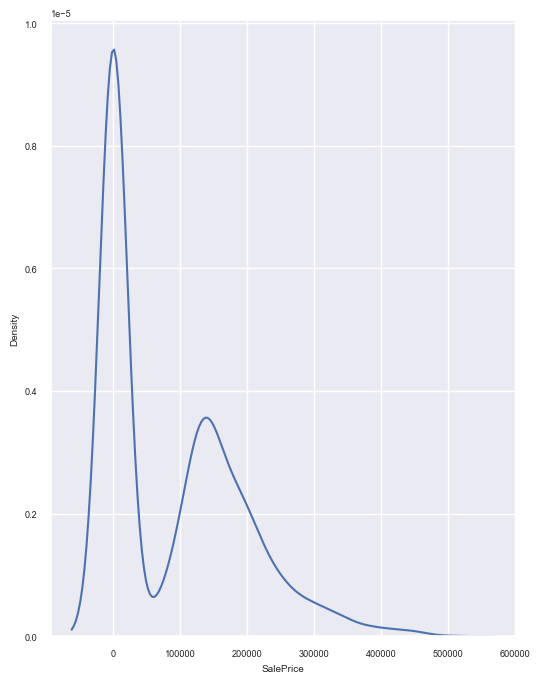

In [47]:
sns.kdeplot(data = df, x = df['SalePrice'])